In [1]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import re
from scipy.stats import linregress
import seaborn as sns

In [2]:
# use pandas to read csv into dataframe
file_to_load = os.path.join('..','Resources','pokemon.csv')
pokemon_df = pd.read_csv(file_to_load)
pokemon_df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
# check column names
pokemon_df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [4]:
# check for null values, type2 should have many nulls due to the nature of pokemon types
pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [5]:
# total of 801 pokemon in this list, as expected
len(pokemon_df)

801

In [6]:
# number of rows with null values in this column makes up 2.5% of all rows, and therefore is worth the time cleaning
100 * len(pokemon_df[pokemon_df['weight_kg'].isna()]) / len(pokemon_df)

2.4968789013732833

In [7]:
# check that pokemon with null values for height and weight are the same pokemon
pokemon_df[pokemon_df['height_m'].isna()]['name'] == pokemon_df[pokemon_df['weight_kg'].isna()]['name']

18     True
19     True
25     True
26     True
27     True
36     True
37     True
49     True
50     True
51     True
52     True
73     True
74     True
75     True
87     True
88     True
102    True
104    True
719    True
744    True
Name: name, dtype: bool

In [8]:
# added all of the weights manually using serebii.net
pokemon_df.loc[18,'height_m'] = 0.3 
pokemon_df.loc[18,'weight_kg'] = 3.5 

In [9]:
# check that cell value changed
pokemon_df.loc[18,'height_m']

0.3

In [10]:
# repeated for all missing values in height and weight columns
pokemon_df.loc[19,'height_m'] = 0.7 
pokemon_df.loc[19,'weight_kg'] = 18.5

pokemon_df.loc[25,'height_m'] = 0.8 
pokemon_df.loc[25,'weight_kg'] = 30.0

pokemon_df.loc[26,'height_m'] = 0.6 
pokemon_df.loc[26,'weight_kg'] = 12.0

pokemon_df.loc[27,'height_m'] = 1.0 
pokemon_df.loc[27,'weight_kg'] = 29.5

pokemon_df.loc[36,'height_m'] = 0.6
pokemon_df.loc[36,'weight_kg'] = 9.9

pokemon_df.loc[37,'height_m'] = 1.1
pokemon_df.loc[37,'weight_kg'] = 19.9

pokemon_df.loc[49,'height_m'] = 0.2 
pokemon_df.loc[49,'weight_kg'] = 0.8

pokemon_df.loc[50,'height_m'] = 0.7
pokemon_df.loc[50,'weight_kg'] = 33.3

pokemon_df.loc[51,'height_m'] = 0.4
pokemon_df.loc[51,'weight_kg'] = 4.2

pokemon_df.loc[52,'height_m'] = 1.0
pokemon_df.loc[52,'weight_kg'] = 32.0

pokemon_df.loc[73,'height_m'] = 0.4
pokemon_df.loc[73,'weight_kg'] = 20.0

pokemon_df.loc[74,'height_m'] = 1.0
pokemon_df.loc[74,'weight_kg'] = 105.0

pokemon_df.loc[75,'height_m'] = 1.4
pokemon_df.loc[75,'weight_kg'] = 300.0

pokemon_df.loc[87,'height_m'] = 0.9
pokemon_df.loc[87,'weight_kg'] = 30.0

pokemon_df.loc[88,'height_m'] = 1.2
pokemon_df.loc[88,'weight_kg'] = 30.0

pokemon_df.loc[102,'height_m'] = 2.0
pokemon_df.loc[102,'weight_kg'] = 120.0

pokemon_df.loc[104,'height_m'] = 1.0
pokemon_df.loc[104,'weight_kg'] = 45.0

pokemon_df.loc[719,'height_m'] = 0.5
pokemon_df.loc[719,'weight_kg'] = 9.0

pokemon_df.loc[744,'height_m'] = 0.9
pokemon_df.loc[744,'weight_kg'] = 25.0

In [11]:
# data is cleaner
pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg              0
generation             0


In [12]:
# add female percentage
pokemon_df['percentage_female'] = 100 - pokemon_df['percentage_male'] 
pokemon_df['percentage_female']

0      11.9
1      11.9
2      11.9
3      11.9
4      11.9
       ... 
796     NaN
797     NaN
798     NaN
799     NaN
800     NaN
Name: percentage_female, Length: 801, dtype: float64

In [13]:
# create non-binary categories for null gender values
pokemon_df['non-binary'] = 0
pokemon_df.head(2)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,65,65,45,grass,poison,6.9,1,0,11.9,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,80,60,grass,poison,13.0,1,0,11.9,0


In [14]:
#replace null values for male and female percentages with 0
pokemon_df.loc[pokemon_df['percentage_male'].isna()] = pokemon_df.loc[pokemon_df['percentage_male'].isna()].replace(np.nan, 0)

In [15]:
# gender values are checked, along with is_legendary since most non-binary should be legendary
pokemon_df[['percentage_male', 'is_legendary' , 'percentage_female', 'non-binary']]

,percentage_male,is_legendary,percentage_female,non-binary
0,88.1,0,11.9,0
1,88.1,0,11.9,0
2,88.1,0,11.9,0
3,88.1,0,11.9,0
4,88.1,0,11.9,0
...,...,...,...,...
796,0.0,1,0.0,0
797,0.0,1,0.0,0
798,0.0,1,0.0,0
799,0.0,1,0.0,0


In [16]:
#check a few rows where there should be at least one legendary, and thus non-binary
pokemon_df.iloc[490:493, 10:]

,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
490,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,90,...,135,90,125,dark,0,50.5,4,1,0.0,0
491,0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5,103,...,120,75,127,grass,grass,2.1,4,1,0.0,0
492,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,120,...,120,120,120,normal,0,320.0,4,1,0.0,0


In [17]:
# create pandas series containing all non-binary pokemon
nonbinary = pokemon_df.loc[(pokemon_df['percentage_male'] == 0) & (pokemon_df['percentage_female'] == 0)]['non-binary']

In [18]:
# change non-binary pokemon percentages to 100%
nonbinary = nonbinary.replace(0, 100)
#get index for all non-binary pokemon and make a list out of it
nonbinary_index = nonbinary.index.tolist()

In [19]:
non_binary_pokemon = pokemon_df.iloc[nonbinary_index]
non_binary_names = non_binary_pokemon['name'].tolist()

In [20]:
# assign all non-binary pokemon to a percetange of 100%, leaving all binary pokemon at a default of 0%
pokemon_df['non-binary'].iloc[nonbinary_index] = 100

/Users/johnwhendricks/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
#check column to confirm success
pokemon_df['non-binary']

0        0
1        0
2        0
3        0
4        0
      ... 
796    100
797    100
798    100
799    100
800    100
Name: non-binary, Length: 801, dtype: int64

In [22]:
pokemon_df.iloc[490:500]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
490,['Bad Dreams'],2.00,0.5,1.0,1.0,2.0,2.0,1.0,1.0,0.5,...,135,90,125,dark,0,50.5,4,1,0.0,100
491,"['Natural Cure', 'Serene Grace']",2.00,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,120,75,127,grass,grass,2.1,4,1,0.0,100
492,['Multitype'],1.00,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,120,120,120,normal,0,320.0,4,1,0.0,100
493,['Victory Star'],1.00,2.0,1.0,1.0,0.5,0.5,0.5,1.0,2.0,...,100,100,100,psychic,fire,4.0,5,1,0.0,100
494,"['Overgrow', 'Contrary']",2.00,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,45,55,63,grass,NaN,8.1,5,0,11.9,0
495,"['Overgrow', 'Contrary']",2.00,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,60,75,83,grass,NaN,16.0,5,0,11.9,0
496,"['Overgrow', 'Contrary']",2.00,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,75,95,113,grass,NaN,63.0,5,0,11.9,0
497,"['Blaze', 'Thick Fat']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,45,45,45,fire,NaN,9.9,5,0,11.9,0
498,"['Blaze', 'Thick Fat']",0.25,0.5,1.0,1.0,1.0,1.0,0.5,2.0,1.0,...,70,55,55,fire,fighting,55.5,5,0,11.9,0
499,"['Blaze', 'Reckless']",0.25,0.5,1.0,1.0,1.0,1.0,0.5,2.0,1.0,...,100,65,65,fire,fighting,150.0,5,0,11.9,0


In [23]:
# cleaned values in row 773
pokemon_df.iloc[773,23] = '30'
clean_pokemon_df = pokemon_df.copy()
clean_pokemon_df.iloc[773,23]

'30'

In [24]:
# change capture_rate from string to int
clean_pokemon_df=clean_pokemon_df.astype({'capture_rate':int})
clean_pokemon_df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate           int64
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [25]:
# only type2 has null values, which will be changed later to none
clean_pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male        0
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                346
weight_kg              0
generation             0


In [26]:
# replace all null and 0 values in type2 with none
clean_pokemon_df.loc[:, clean_pokemon_df.columns == 'type2'] = clean_pokemon_df.loc[:, 'type2'].replace(np.nan, 'none').replace(0,'none')
clean_pokemon_df['type2']

0      poison
1      poison
2      poison
3        none
4        none
        ...  
796    flying
797     steel
798    dragon
799      none
800     fairy
Name: type2, Length: 801, dtype: object

r value: 0.0453511986460209
p value: 0.1997786859179645


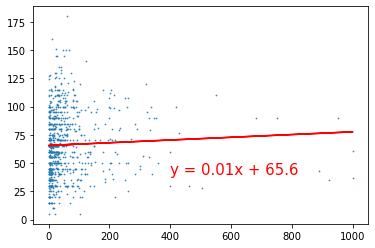

In [27]:
# plot weight vs speed: no relationship apparent
(slope, intercept, r_value, p_value, std_err) = linregress(clean_pokemon_df['weight_kg'].values.tolist(), clean_pokemon_df['speed'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(weight * slope + intercept) for weight in clean_pokemon_df['weight_kg'].values.tolist()]
plt.scatter(clean_pokemon_df['weight_kg'],clean_pokemon_df['speed'], s = 0.6, alpha = 0.8)
plt.plot(clean_pokemon_df['weight_kg'].values.tolist(),regress_values,"r")
plt.annotate(line_eq, (400,40), fontsize=15, color="red")
print(f"r value: {r_value}\np value: {p_value}")
plt.show()

r value: 0.6264207002953233
p_value: 1.6117587628866627e-88


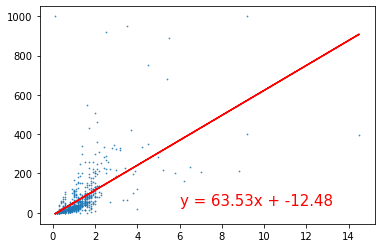

In [28]:
# plot height vs weight: positive linear relationship
(slope, intercept, r_value, p_value, std_err) = linregress(clean_pokemon_df['height_m'].values.tolist(), clean_pokemon_df['weight_kg'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(height * slope + intercept) for height in clean_pokemon_df['height_m'].values.tolist()]
plt.scatter(clean_pokemon_df['height_m'],clean_pokemon_df['weight_kg'], s = 0.6, alpha = 0.8)
plt.plot(clean_pokemon_df['height_m'].values.tolist(),regress_values,"r")
plt.annotate(line_eq, (6,40), fontsize=15, color="red")
print(f"r value: {r_value}\np_value: {p_value}")
plt.show()

r value: 0.3681539995495992


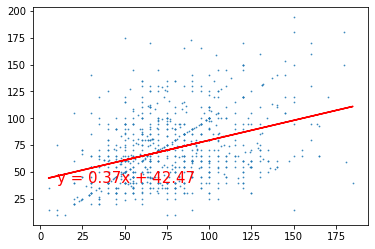

In [29]:
(slope, intercept, r_value, p_value, std_err) = linregress(clean_pokemon_df['attack'].values.tolist(), clean_pokemon_df['sp_attack'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in clean_pokemon_df['attack'].values.tolist()]
plt.scatter(clean_pokemon_df['attack'],clean_pokemon_df['sp_attack'], s = 0.6, alpha = 0.8)
plt.plot(clean_pokemon_df['attack'].values.tolist(),regress_values,"r")
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
print(f"r value: {r_value}")
plt.show()

r value: 0.4689149139189303


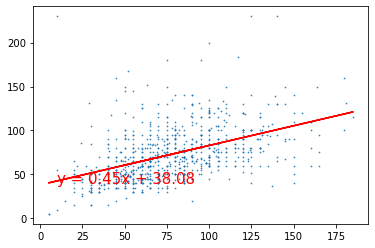

In [30]:
(slope, intercept, r_value, p_value, std_err) = linregress(clean_pokemon_df['attack'].values.tolist(), clean_pokemon_df['defense'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in clean_pokemon_df['attack'].values.tolist()]
plt.scatter(clean_pokemon_df['attack'],clean_pokemon_df['defense'], s = 0.6, alpha = 0.8)
plt.plot(clean_pokemon_df['attack'].values.tolist(),regress_values,"r")
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
print(f"r value: {r_value}")
plt.show()

r value: 0.5263482757215798


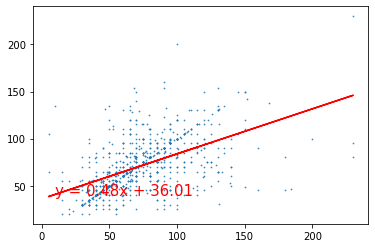

In [31]:
(slope, intercept, r_value, p_value, std_err) = linregress(clean_pokemon_df['defense'].values.tolist(), clean_pokemon_df['sp_defense'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in clean_pokemon_df['defense'].values.tolist()]
plt.scatter(clean_pokemon_df['defense'],clean_pokemon_df['sp_defense'], s = 0.6, alpha = 0.8)
plt.plot(clean_pokemon_df['defense'].values.tolist(),regress_values,"r")
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
print(f"r value: {r_value}")
plt.show()

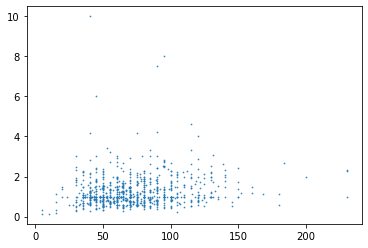

In [32]:
plt.scatter(clean_pokemon_df['defense'],clean_pokemon_df['attack'] / clean_pokemon_df['sp_attack'] ,s = 0.6, alpha = 0.8 )

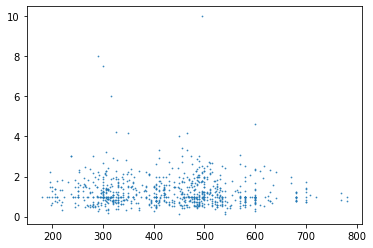

In [33]:
plt.scatter(clean_pokemon_df['base_total'],clean_pokemon_df['attack'] / clean_pokemon_df['sp_attack'] ,s = 0.6, alpha = 0.8 )

<BarContainer object of 2 artists>

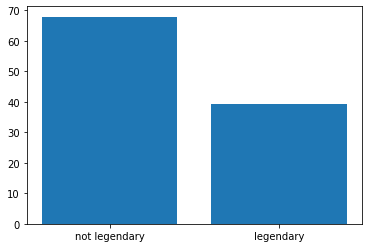

In [34]:
happiness = clean_pokemon_df.groupby('is_legendary').mean()['base_happiness']
plt.bar(['not legendary', 'legendary'],[happiness[0], happiness[1]])

<BarContainer object of 2 artists>

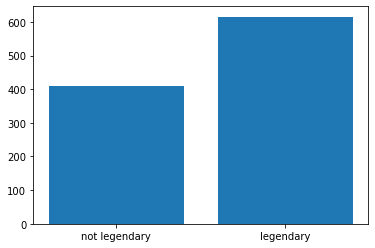

In [35]:
base_tot = clean_pokemon_df.groupby('is_legendary').mean()['base_total']
plt.bar(['not legendary', 'legendary'],[base_tot[0], base_tot[1]])

<BarContainer object of 2 artists>

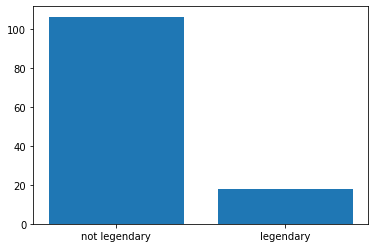

In [36]:
capt_rate = clean_pokemon_df.groupby('is_legendary').mean()['capture_rate']
plt.bar(['not legendary', 'legendary'],[capt_rate[0], capt_rate[1]])

<BarContainer object of 2 artists>

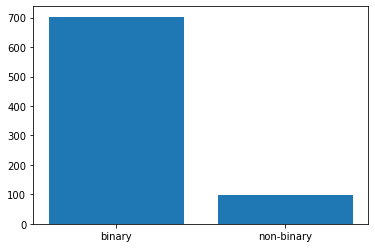

In [37]:
non_binary_counts = clean_pokemon_df.groupby('non-binary').count()['is_legendary']
ind = ['binary', 'non-binary']
val = non_binary_counts.values.tolist()
plt.bar(ind, val)

<AxesSubplot:ylabel='Frequency'>

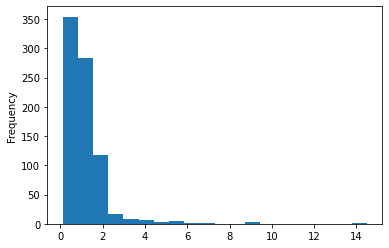

In [38]:
# histogram of height distribution
clean_pokemon_df['height_m'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

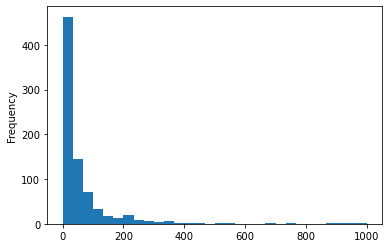

In [39]:
# histogram of weight distribution
clean_pokemon_df['weight_kg'].plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

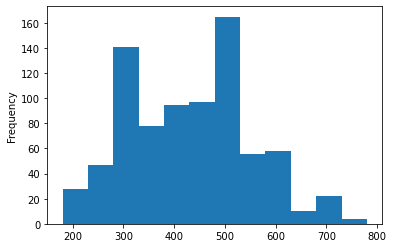

In [40]:
clean_pokemon_df['base_total'].plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

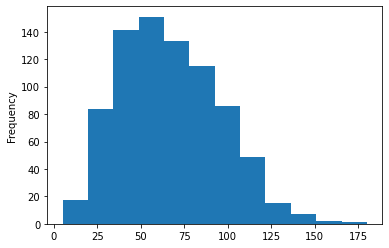

In [41]:
clean_pokemon_df['speed'].plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

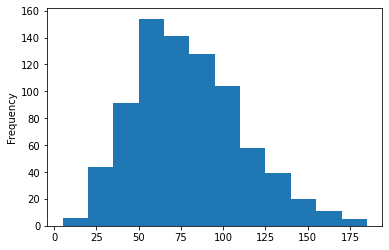

In [42]:
clean_pokemon_df['attack'].plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

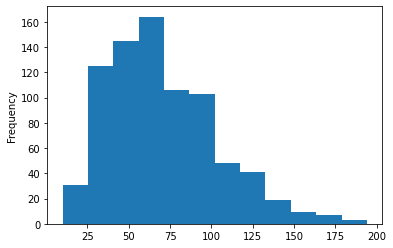

In [43]:
clean_pokemon_df['sp_attack'].plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

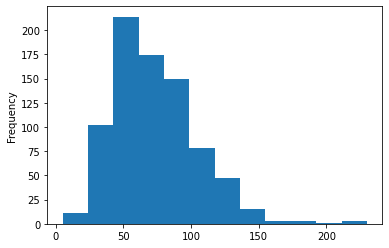

In [44]:
clean_pokemon_df['defense'].plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

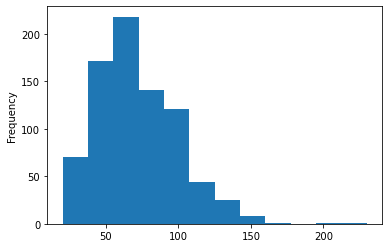

In [45]:
clean_pokemon_df['sp_defense'].plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

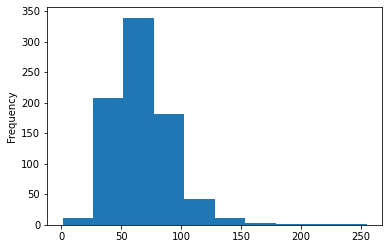

In [46]:
clean_pokemon_df['hp'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

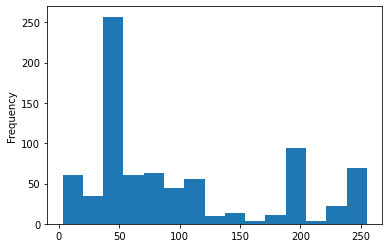

In [47]:
clean_pokemon_df['capture_rate'].plot.hist(bins=15)

In [48]:
nonBinary_df = clean_pokemon_df.loc[clean_pokemon_df['non-binary'] == 100]
nonBinary_df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
80,"['Magnet Pull', 'Sturdy', 'Analytic']",0.5,1.0,0.5,0.5,0.5,2.0,2.0,0.25,1.0,...,95,55,45,electric,steel,6.0,1,0,0.0,100
81,"['Magnet Pull', 'Sturdy', 'Analytic']",0.5,1.0,0.5,0.5,0.5,2.0,2.0,0.25,1.0,...,120,70,70,electric,steel,60.0,1,0,0.0,100
99,"['Soundproof', 'Static', 'Aftermath']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.50,1.0,...,55,55,100,electric,none,10.4,1,0,0.0,100
100,"['Soundproof', 'Static', 'Aftermath']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.50,1.0,...,80,80,150,electric,none,66.6,1,0,0.0,100
119,"['Illuminate', 'Natural Cure', 'Analytic']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.00,1.0,...,70,55,85,water,none,34.5,1,0,0.0,100


In [49]:
binary_df = clean_pokemon_df.loc[clean_pokemon_df['non-binary'] == 0]

In [50]:
generations = clean_pokemon_df.groupby('generation').count()
generations

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary,percentage_female,non-binary
generation,,,,,,,,,,,,,,,,,,,,,
1,151,151,151,151,151,151,151,151,151,151,...,151,151,151,151,151,151,151,151,151,151
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135
4,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
5,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
6,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
7,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80


In [51]:
generations_list = generations.index.tolist()

In [52]:
generations['name']

generation
1    151
2    100
3    135
4    107
5    156
6     72
7     80
Name: name, dtype: int64

<BarContainer object of 7 artists>

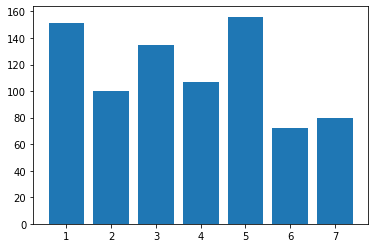

In [53]:
plt.bar(generations_list, generations['name'])

r value: -0.5709740489725594 
p value: 0.18062869821794605


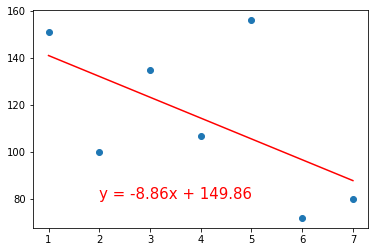

In [54]:
(slope, intercept, r_value, p_value, std_err) = linregress(generations_list, generations['name'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in generations_list]
plt.scatter(generations_list, generations['name'].values.tolist())
plt.plot(generations_list, regress_values,"r")
plt.annotate(line_eq, (2,80), fontsize=15, color="red")
print(f"r value: {r_value} \np value: {p_value}")
plt.show()

In [55]:
clean_pokemon_df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary', 'percentage_female', 'non-binary'],
      dtype='object')

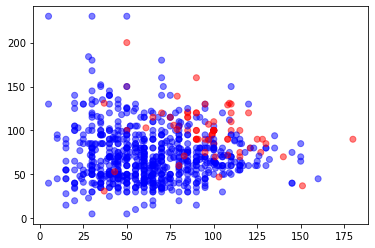

In [56]:
rarity_dict = {0:'blue', 1:'red'}
plt.scatter(clean_pokemon_df['speed'], clean_pokemon_df['defense'], c = clean_pokemon_df['is_legendary'].map(rarity_dict), alpha=0.5)

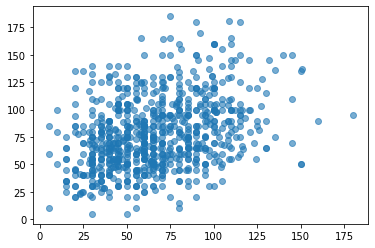

In [57]:
plt.scatter(clean_pokemon_df['speed'], clean_pokemon_df['attack'], alpha=0.6)

In [58]:
clean_pokemon_df.head(2)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,65,65,45,grass,poison,6.9,1,0,11.9,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,80,60,grass,poison,13.0,1,0,11.9,0


In [59]:
stat_index = [19,25,28, 33, 34, 35, 40]
stats_df = clean_pokemon_df.iloc[:, stat_index]

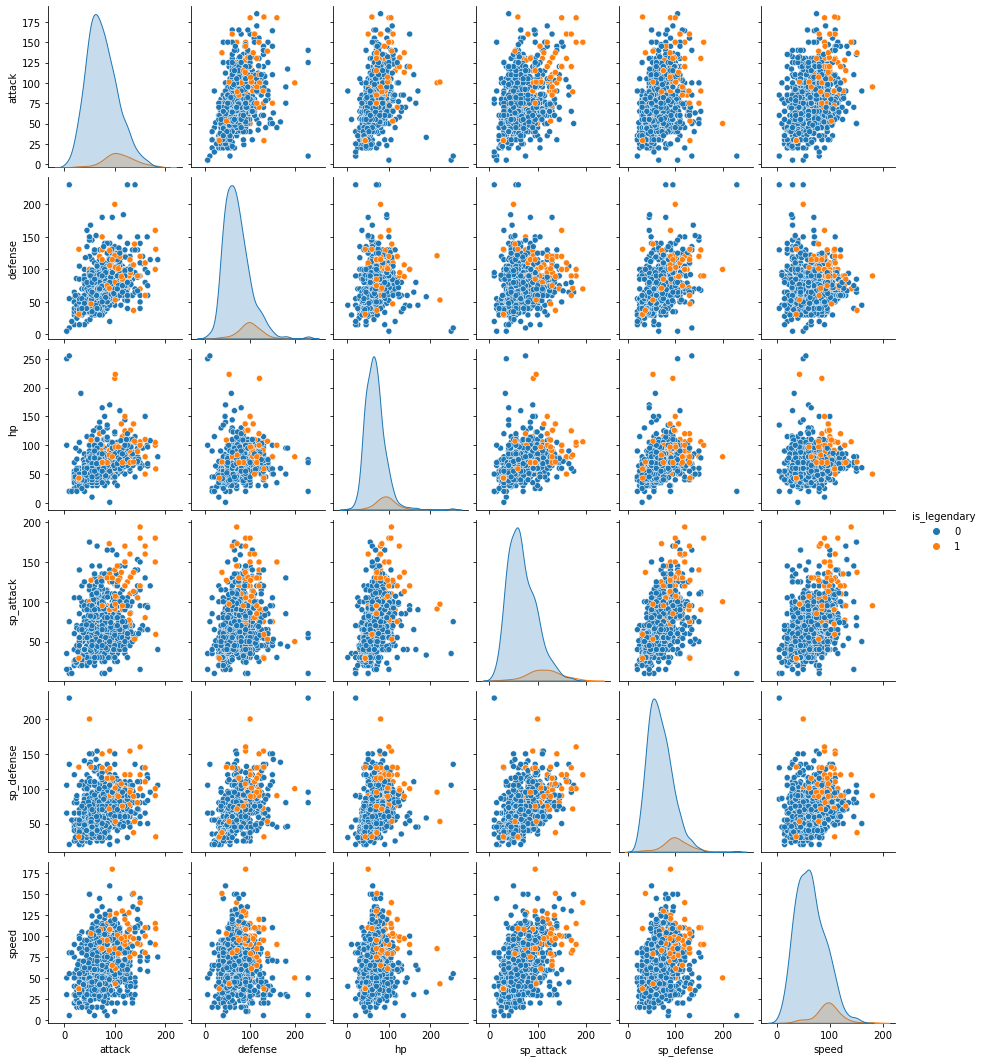

In [60]:
sns.pairplot(stats_df, aspect = 0.85, hue = 'is_legendary')

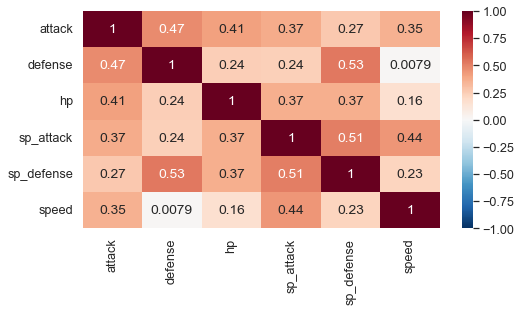

In [61]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    stats_df.iloc[:,0:6].corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

In [62]:
# make copy of dataframe for ease of use
df = clean_pokemon_df.copy()
df.attack

0       49
1       62
2      100
3       52
4       64
      ... 
796    101
797    181
798    101
799    107
800     95
Name: attack, Length: 801, dtype: int64

In [63]:
df.sort_values(by=['attack'], ascending=False)[['name', 'attack']].head(10)

,name,attack
213,Heracross,185
797,Kartana,181
382,Groudon,180
383,Rayquaza,180
444,Garchomp,170
408,Rampardos,165
353,Banette,165
474,Gallade,165
247,Tyranitar,164
288,Slaking,160


In [64]:
df.sort_values(by=['defense'], ascending=False)[['name', 'defense']].head(10)

,name,defense
305,Aggron,230
212,Shuckle,230
207,Steelix,230
376,Regirock,200
712,Avalugg,184
90,Cloyster,180
79,Slowbro,180
410,Bastiodon,168
94,Onix,160
382,Groudon,160


In [65]:
df.sort_values(by=['hp'], ascending=False)[['name', 'hp']].head(11)

,name,hp
241,Blissey,255
112,Chansey,250
798,Guzzlord,223
717,Zygarde,216
201,Wobbuffet,190
320,Wailord,170
593,Alomomola,165
142,Snorlax,160
486,Giratina,150
425,Drifblim,150


In [66]:
df.sort_values(by=['base_total'], ascending=False)[['name', 'base_total']].head(14)

,name,base_total
149,Mewtwo,780
383,Rayquaza,780
382,Groudon,770
381,Kyogre,770
492,Arceus,720
717,Zygarde,708
380,Latios,700
372,Salamence,700
247,Tyranitar,700
444,Garchomp,700


In [67]:
df.sort_values(by=['base_happiness'], ascending=False)[['name', 'base_happiness']].head(10)

,name,base_happiness
34,Clefairy,140
481,Azelf,140
35,Clefable,140
172,Cleffa,140
427,Lopunny,140
439,Happiny,140
241,Blissey,140
112,Chansey,140
479,Uxie,140
480,Mesprit,140


In [68]:
df.sort_values(by=['speed'], ascending=False)[['name', 'speed']].head(10)

,name,speed
385,Deoxys,180
290,Ninjask,160
794,Pheromosa,151
100,Electrode,150
141,Aerodactyl,150
64,Alakazam,150
616,Accelgor,145
253,Sceptile,145
14,Beedrill,145
149,Mewtwo,140


In [69]:
# the type attribute is difficult due the nature of it, so first visualize it
df.groupby(['type1','type2']).count().head(30)

abilities  against_bug  against_dark  against_dragon  \
type1  type2                                                            
bug    electric          4            4             4               4   
       fairy             2            2             2               2   
       fighting          3            3             3               3   
       fire              2            2             2               2   
       flying           13           13            13              13   
       ghost             1            1             1               1   
       grass             6            6             6               6   
       ground            1            1             1               1   
       none             18           18            18              18   
       poison           11           11            11              11   
       rock              3            3             3               3   
       steel             5            5             5               5   
       water             3            3             3               3   
dark   dragon            4            4             4               4   
       fighting          2            2             2               2   
       fire              2            2             2               2   
       flying            5            5             5               5   
       ghost             1            1             1               1   
       ice               2            2             2               2   
       none              9            9             9               9   
       psychic           2            2             2               2   
       steel             2            2             2               2   
dragon electric          1            1             1               1   
       fighting          2            2             2               2   
       fire              1            1             1               1   
       flying            4            4             4               4   
       ground            4            4             4               4   
       ice               1            1             1               1   
       none             12           12            12              12   
       psychic           2            2             2               2   

                 against_electric  against_fairy  against_fight  against_fire  \
type1  type2                                                                    
bug    electric                 4              4              4             4   
       fairy                    2              2              2             2   
       fighting                 3              3              3             3   
       fire                     2              2              2             2   
       flying                  13             13             13            13   
       ghost                    1              1              1             1   
       grass                    6              6              6             6   
       ground                   1              1              1             1   
       none                    18             18             18            18   
       poison                  11             11             11            11   
       rock                     3              3              3             3   
       steel                    5              5              5             5   
       water                    3              3              3             3   
dark   dragon                   4              4              4             4   
       fighting                 2              2              2             2   
       fire                     2              2              2             2   
       flying                   5              5              5             5   
       ghost                    1              1              1             1   
       ice                      2              2            

In [70]:
# using fire type as an example, we can extract pokemon that are fire type
fire_df = clean_pokemon_df[(clean_pokemon_df['type1'] == 'fire') | (clean_pokemon_df['type2'] == 'fire')]
fire_df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,60,50,65,fire,none,8.5,1,0,11.9,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,80,65,80,fire,none,19.0,1,0,11.9,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.50,0.5,0.50,1.0,1.0,...,159,115,100,fire,flying,90.5,1,0,11.9,0
36,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,50,65,65,fire,ice,9.9,1,0,75.4,0
37,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,81,100,109,fire,ice,19.9,1,0,75.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,"['Blaze', 'Intimidate']",1.00,0.5,1.0,1.0,1.00,2.0,0.50,1.0,0.5,...,80,90,60,fire,dark,83.0,7,0,11.9,0
740,['Dancer'],0.25,1.0,1.0,2.0,0.50,0.5,0.50,1.0,1.0,...,98,70,93,fire,flying,3.4,7,0,75.4,0
756,"['Corrosion', 'Oblivious']",0.25,1.0,1.0,1.0,0.25,0.5,0.50,1.0,1.0,...,71,40,77,poison,fire,4.8,7,0,11.9,0
757,"['Corrosion', 'Oblivious']",0.25,1.0,1.0,1.0,0.25,0.5,0.50,1.0,1.0,...,111,60,117,poison,fire,22.2,7,0,100.0,0


In [71]:
# every possible type shows up in type1, 
# so we only have to iterate through df['type1'] to obtain every unique type
types = df['type1'].values.tolist()

# will hold every possible type
types_list = []

# itterate thru each type in types and add to types_list if not yet in types_list
for _type in types:
    if _type not in types_list:
        types_list.append(_type)

# types_list holds each unique type
types_list

['grass',
 'fire',
 'water',
 'bug',
 'normal',
 'poison',
 'electric',
 'ground',
 'fairy',
 'fighting',
 'psychic',
 'rock',
 'ghost',
 'ice',
 'dragon',
 'dark',
 'steel',
 'flying']

In [72]:
# there are 18 different types
num_types = len(types_list)
num_types

18

In [73]:
# calculate every possible type here
# calculate each type that has occured

In [74]:
# dictionary holds each type of pokemon as a dataframe
type_dict = dict()
for _type in types_list:
    type_dict[_type] = clean_pokemon_df[(clean_pokemon_df['type1'] == _type) | (clean_pokemon_df['type2'] == _type)]

In [75]:
# check to confirm that the dictionary is structured as intended
type_dict['fire'].equals(fire_df)

True

In [76]:
# there are 77 bug pokemon
len(type_dict['bug'])

77

In [77]:
num_types = []
for _type in types_list:
    length = len(type_dict[_type])
    num_types.append(length)
num_types

[97, 64, 131, 77, 109, 64, 47, 64, 47, 53, 82, 59, 41, 38, 44, 50, 46, 98]

In [78]:
total_pokemon = len(df)
pct_list = []
for num in num_types:
    pct = round(num/total_pokemon*100,1)
    pct_list.append(pct)
pct_list

[12.1,
 8.0,
 16.4,
 9.6,
 13.6,
 8.0,
 5.9,
 8.0,
 5.9,
 6.6,
 10.2,
 7.4,
 5.1,
 4.7,
 5.5,
 6.2,
 5.7,
 12.2]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

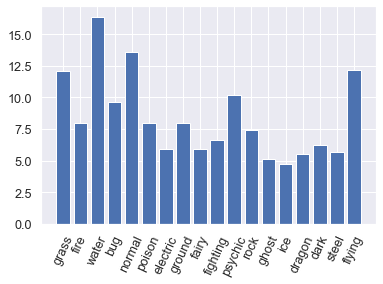

In [79]:
# ice types are the leaset common, followed by ghost
plt.bar(types_list, pct_list)
plt.xticks(rotation = 65)

In [80]:
# we can find the average base total of each pokemon type
type_dict['bug']['base_total'].mean()

380.4415584415584

(300.0, 520.0)

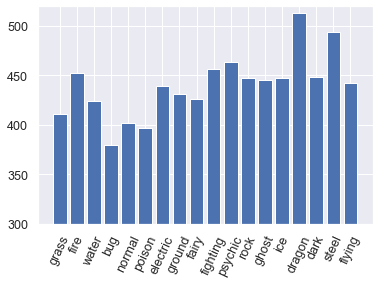

In [81]:
# graph each type by its average total base stat
# dragon has the highest base stats, whereas bug has the lowest
types_base_total = list()

for _type in types_list:
    _mean = type_dict[_type]['base_total'].mean()
    types_base_total.append(round(_mean,0))

plt.bar(types_list, types_base_total)
plt.xticks(rotation = 65)
plt.ylim(300, 520)

(40.0, 110.0)

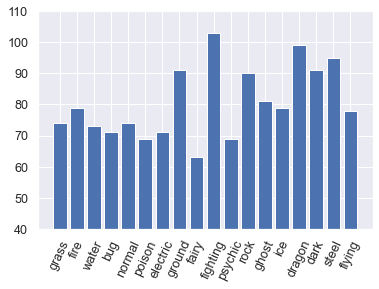

In [82]:
# fairy have lowest average attack, and fighting has the highest
types_attack = list()
for _type in types_list:
    _mean = type_dict[_type]['attack'].mean()
    types_attack.append(round(_mean,0))

plt.bar(types_list, types_attack)
plt.xticks(rotation = 65)
plt.ylim(40,110)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

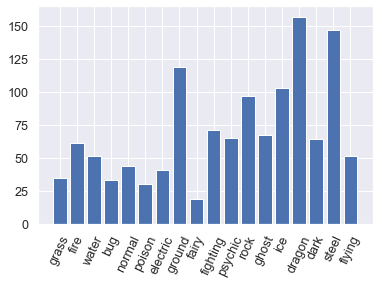

In [83]:
types_weight = list()
for _type in types_list:
    _mean = type_dict[_type]['weight_kg'].mean()
    types_weight.append(round(_mean,0))

plt.bar(types_list, types_weight)
plt.xticks(rotation = 65)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

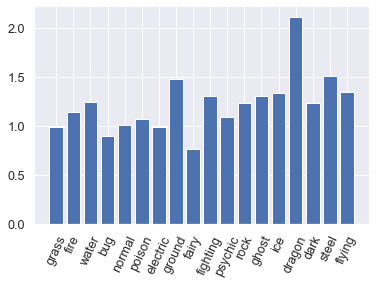

In [84]:
types_height = list()
for _type in types_list:
    _mean = type_dict[_type]['height_m'].mean()
    types_height.append(_mean)

plt.bar(types_list, types_height)
plt.xticks(rotation = 65)

(40.0, 90.0)

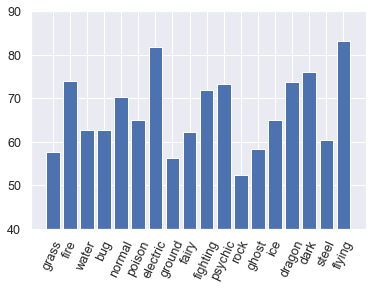

In [85]:
types_speed = list()
for _type in types_list:
    _mean = type_dict[_type]['speed'].mean()
    types_speed.append(_mean)

plt.bar(types_list, types_speed)
plt.xticks(rotation = 65)
plt.ylim(40,90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

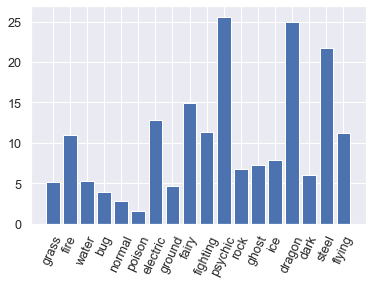

In [86]:
types_legd = list()
for _type in types_list:
    _mean = type_dict[_type]['is_legendary'].mean() * 100
    types_legd.append(_mean)

plt.bar(types_list, types_legd)
plt.xticks(rotation = 65)
# plt.ylim(40,90)

(40.0, 80.0)

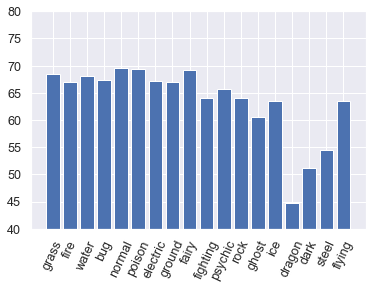

In [87]:
types_hap = list()
for _type in types_list:
    _mean = type_dict[_type]['base_happiness'].mean()
    types_hap.append(_mean)

plt.bar(types_list, types_hap)
plt.xticks(rotation = 65)
plt.ylim(40, 80)

In [88]:
ability_list = clean_pokemon_df.abilities.values.tolist()

In [89]:
cleaner_ability_list = []

for ability_group in ability_list:
    ability_group = ability_group.strip('[').strip(']').replace(' ','').split(',')
    cleaner_ability_list.append(ability_group)
cleaner_ability_list

[["'Overgrow'", "'Chlorophyll'"],
 ["'Overgrow'", "'Chlorophyll'"],
 ["'Overgrow'", "'Chlorophyll'"],
 ["'Blaze'", "'SolarPower'"],
 ["'Blaze'", "'SolarPower'"],
 ["'Blaze'", "'SolarPower'"],
 ["'Torrent'", "'RainDish'"],
 ["'Torrent'", "'RainDish'"],
 ["'Torrent'", "'RainDish'"],
 ["'ShieldDust'", "'RunAway'"],
 ["'ShedSkin'"],
 ["'Compoundeyes'", "'TintedLens'"],
 ["'ShieldDust'", "'RunAway'"],
 ["'ShedSkin'"],
 ["'Swarm'", "'Sniper'"],
 ["'KeenEye'", "'TangledFeet'", "'BigPecks'"],
 ["'KeenEye'", "'TangledFeet'", "'BigPecks'"],
 ["'KeenEye'", "'TangledFeet'", "'BigPecks'"],
 ["'RunAway'", "'Guts'", "'Hustle'", "'Gluttony'", "'Hustle'", "'ThickFat'"],
 ["'RunAway'", "'Guts'", "'Hustle'", "'Gluttony'", "'Hustle'", "'ThickFat'"],
 ["'KeenEye'", "'Sniper'"],
 ["'KeenEye'", "'Sniper'"],
 ["'Intimidate'", "'ShedSkin'", "'Unnerve'"],
 ["'Intimidate'", "'ShedSkin'", "'Unnerve'"],
 ["'Static'", "'Lightningrod'"],
 ["'Static'", "'Lightningrod'", "'SurgeSurfer'"],
 ["'SandVeil'", "'SandRush'",

In [90]:
clean_ability_list = []
for group in cleaner_ability_list:
    for ability in group:
        ability = ability.strip("'")
        clean_ability_list.append(ability)
clean_ability_list       

['Overgrow',
 'Chlorophyll',
 'Overgrow',
 'Chlorophyll',
 'Overgrow',
 'Chlorophyll',
 'Blaze',
 'SolarPower',
 'Blaze',
 'SolarPower',
 'Blaze',
 'SolarPower',
 'Torrent',
 'RainDish',
 'Torrent',
 'RainDish',
 'Torrent',
 'RainDish',
 'ShieldDust',
 'RunAway',
 'ShedSkin',
 'Compoundeyes',
 'TintedLens',
 'ShieldDust',
 'RunAway',
 'ShedSkin',
 'Swarm',
 'Sniper',
 'KeenEye',
 'TangledFeet',
 'BigPecks',
 'KeenEye',
 'TangledFeet',
 'BigPecks',
 'KeenEye',
 'TangledFeet',
 'BigPecks',
 'RunAway',
 'Guts',
 'Hustle',
 'Gluttony',
 'Hustle',
 'ThickFat',
 'RunAway',
 'Guts',
 'Hustle',
 'Gluttony',
 'Hustle',
 'ThickFat',
 'KeenEye',
 'Sniper',
 'KeenEye',
 'Sniper',
 'Intimidate',
 'ShedSkin',
 'Unnerve',
 'Intimidate',
 'ShedSkin',
 'Unnerve',
 'Static',
 'Lightningrod',
 'Static',
 'Lightningrod',
 'SurgeSurfer',
 'SandVeil',
 'SandRush',
 'SnowCloak',
 'SlushRush',
 'SandVeil',
 'SandRush',
 'SnowCloak',
 'SlushRush',
 'PoisonPoint',
 'Rivalry',
 'Hustle',
 'PoisonPoint',
 'Rivalr

In [91]:
# same as last cell, but with a dictionary
clean_ability_dict = {}
group_counter = 0
for group in cleaner_ability_list:
    group_list = []
    for ability in group:
        ability = ability.strip("'")
        group_list.append(ability)
    clean_ability_dict[group_counter] = group_list
    group_counter += 1

clean_ability_dict


{0: ['Overgrow', 'Chlorophyll'],
 1: ['Overgrow', 'Chlorophyll'],
 2: ['Overgrow', 'Chlorophyll'],
 3: ['Blaze', 'SolarPower'],
 4: ['Blaze', 'SolarPower'],
 5: ['Blaze', 'SolarPower'],
 6: ['Torrent', 'RainDish'],
 7: ['Torrent', 'RainDish'],
 8: ['Torrent', 'RainDish'],
 9: ['ShieldDust', 'RunAway'],
 10: ['ShedSkin'],
 11: ['Compoundeyes', 'TintedLens'],
 12: ['ShieldDust', 'RunAway'],
 13: ['ShedSkin'],
 14: ['Swarm', 'Sniper'],
 15: ['KeenEye', 'TangledFeet', 'BigPecks'],
 16: ['KeenEye', 'TangledFeet', 'BigPecks'],
 17: ['KeenEye', 'TangledFeet', 'BigPecks'],
 18: ['RunAway', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'ThickFat'],
 19: ['RunAway', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'ThickFat'],
 20: ['KeenEye', 'Sniper'],
 21: ['KeenEye', 'Sniper'],
 22: ['Intimidate', 'ShedSkin', 'Unnerve'],
 23: ['Intimidate', 'ShedSkin', 'Unnerve'],
 24: ['Static', 'Lightningrod'],
 25: ['Static', 'Lightningrod', 'SurgeSurfer'],
 26: ['SandVeil', 'SandRush', 'SnowCloak', 'SlushRush'],
 27: [

In [92]:
# average number of abilities is 2.5, which rounds to 3
avg_num_abilities = len(clean_ability_list) / 801
avg_num_abilities = round(avg_num_abilities, 1)

In [93]:
# first attempt at organizing abilities, commented out

# counter = 1
# abilities_list = []
# for l in the_list:
#     abilities = l.split(',')
#     print(abilities)
#     for ability in abilities:
#         match = re.search(pattern=r'([A-Z][a-z]+)|([A-Z][a-z]+\s[A-Z][a-z]+)', string = ability)
#         if match is not None:
#             print(match.group())
#             if match.group() not in abilities_list:
#                 abilities_list.append(match.group())
#         else:
# #             print(match)
    

In [94]:
df['abilities']=df['abilities'].str.strip('\"[')

In [95]:
df['abilities'] = df['abilities'].str.strip(']\"')

In [96]:
df['abilities'] = df['abilities'].str.split(',')

In [97]:
df[['abilities']]

,abilities
0,"['Overgrow', 'Chlorophyll']"
1,"['Overgrow', 'Chlorophyll']"
2,"['Overgrow', 'Chlorophyll']"
3,"['Blaze', 'Solar Power']"
4,"['Blaze', 'Solar Power']"
...,...
796,['Beast Boost']
797,['Beast Boost']
798,['Beast Boost']
799,['Prism Armor']


In [98]:
df['ability1'] = None
df['ability2'] = None
df['ability3'] = None
df['ability4'] = None
df['ability5'] = None
df['ability6'] = None

In [99]:
a1_index = df.columns.get_loc('ability1')
a2_index = df.columns.get_loc('ability2')
a3_index = df.columns.get_loc('ability3')
a4_index = df.columns.get_loc('ability4')
a5_index = df.columns.get_loc('ability5')
a6_index = df.columns.get_loc('ability6')

In [100]:
# first attempt at organizing abilities, commented out

# index = 0
# # maximum = 0
# all_list = []
# for row in df.iterrows():
#     ability
#     print(abilities)
#     type_counter = 1
#     for ability in abilities:
#         all_list.append(ability)
#         if type_counter == 1:
#             df.iloc[index, 40] = ability
#         elif type_counter == 2:
#             df.iloc[index, 41] = ability
#         elif type_counter == 3:
#             df.iloc[index, 42] = ability
#         elif type_counter == 4:
#             df.iloc[index, 43] = ability
#         elif type_counter == 5:
#             df.iloc[index, 44] = ability
#         else:
#             df.iloc[index, 45] = ability
#         type_counter += 1
#     index += 1

In [101]:
# iterrate through each pokemon and label its ability columns properly
index = 0

for abilities in clean_ability_dict.values():
    
    ability_counter = 1
    
    for ability in abilities:
        
        if ability_counter == 1:
            df.iloc[index, a1_index] = ability
            
        elif ability_counter == 2:
            df.iloc[index, a2_index] = ability
            
        elif ability_counter == 3:
            df.iloc[index, a3_index] = ability
            
        elif ability_counter == 4:
            df.iloc[index, a4_index] = ability
            
        elif ability_counter == 5:
            df.iloc[index, a5_index] = ability
            
        else:
            df.iloc[index, a6_index] = ability
            
        ability_counter += 1
        
    index += 1

# confirm that ability colums were labeled properly
df.iloc[:, a1_index: a6_index+1]

,ability1,ability2,ability3,ability4,ability5,ability6
0,Overgrow,Chlorophyll,None,None,None,None
1,Overgrow,Chlorophyll,None,None,None,None
2,Overgrow,Chlorophyll,None,None,None,None
3,Blaze,SolarPower,None,None,None,None
4,Blaze,SolarPower,None,None,None,None
...,...,...,...,...,...,...
796,BeastBoost,None,None,None,None,None
797,BeastBoost,None,None,None,None,None
798,BeastBoost,None,None,None,None,None
799,PrismArmor,None,None,None,None,None


In [102]:
against = df.columns.tolist()[1:19]
against

['against_bug',
 'against_dark',
 'against_dragon',
 'against_electric',
 'against_fairy',
 'against_fight',
 'against_fire',
 'against_flying',
 'against_ghost',
 'against_grass',
 'against_ground',
 'against_ice',
 'against_normal',
 'against_poison',
 'against_psychic',
 'against_rock',
 'against_steel',
 'against_water']

In [103]:
df['against_sum'] = 0
total_against = df[against].sum()

In [104]:
types_dict = {}
for i,j in list(enumerate(df[against].iterrows())):
#     print(sum(j[1].values.tolist()))
    types_dict[i] = sum(j[1].values.tolist())
#     print(re.match(pattern = '[+-]?([0-9]*[.])?[0-9]+', string= j[1].str))
types_dict

{0: 19.25,
 1: 19.25,
 2: 19.25,
 3: 18.0,
 4: 18.0,
 5: 18.5,
 6: 18.0,
 7: 18.0,
 8: 18.0,
 9: 19.5,
 10: 19.5,
 11: 22.0,
 12: 19.0,
 13: 19.0,
 14: 19.0,
 15: 18.0,
 16: 18.0,
 17: 18.0,
 18: 18.0,
 19: 18.0,
 20: 18.0,
 21: 18.0,
 22: 17.5,
 23: 17.5,
 24: 17.5,
 25: 17.5,
 26: 19.0,
 27: 19.0,
 28: 17.5,
 29: 17.5,
 30: 18.25,
 31: 17.5,
 32: 17.5,
 33: 18.25,
 34: 17.5,
 35: 17.5,
 36: 18.0,
 37: 18.0,
 38: 17.0,
 39: 17.0,
 40: 17.75,
 41: 17.75,
 42: 19.25,
 43: 19.25,
 44: 19.25,
 45: 25.0,
 46: 25.0,
 47: 19.0,
 48: 19.0,
 49: 19.0,
 50: 19.0,
 51: 18.0,
 52: 18.0,
 53: 18.0,
 54: 18.0,
 55: 19.5,
 56: 19.5,
 57: 18.0,
 58: 18.0,
 59: 18.0,
 60: 18.0,
 61: 19.5,
 62: 20.0,
 63: 20.0,
 64: 20.0,
 65: 19.5,
 66: 19.5,
 67: 19.5,
 68: 19.25,
 69: 19.25,
 70: 19.25,
 71: 17.0,
 72: 17.0,
 73: 24.25,
 74: 24.25,
 75: 24.25,
 76: 18.0,
 77: 18.0,
 78: 20.0,
 79: 20.0,
 80: 16.0,
 81: 16.0,
 82: 18.0,
 83: 18.0,
 84: 18.0,
 85: 18.0,
 86: 20.75,
 87: 17.5,
 88: 17.5,
 89: 18.0,
 90

In [105]:
pd.Series(types_dict)

0      19.25
1      19.25
2      19.25
3      18.00
4      18.00
       ...  
796    13.50
797    16.25
798    21.00
799    20.00
800    13.25
Length: 801, dtype: float64

In [106]:
df['against_sum'] = pd.Series(types_dict)

In [107]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,is_legendary,percentage_female,non-binary,ability1,ability2,ability3,ability4,ability5,ability6,against_sum
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0,11.9,0,Overgrow,Chlorophyll,None,None,None,None,19.25
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0,11.9,0,Overgrow,Chlorophyll,None,None,None,None,19.25
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0,11.9,0,Overgrow,Chlorophyll,None,None,None,None,19.25
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0,11.9,0,Blaze,SolarPower,None,None,None,None,18.00
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0,11.9,0,Blaze,SolarPower,None,None,None,None,18.00


In [108]:
df['against_sum'].min()
df['against_sum'].loc[df['against_sum'] == df['against_sum'].min()]
most_resistant_index = df['against_sum'].loc[df['against_sum'] == df['against_sum'].min()].index.tolist()

In [109]:
df.iloc[most_resistant_index].iloc[:,31:]

,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary,ability1,ability2,ability3,ability4,ability5,ability6,against_sum
302,50.0,303,55,95,50,steel,fairy,11.5,3,0,50.0,0,HyperCutter,Intimidate,SheerForce,None,None,None,13.25
706,50.0,707,80,87,75,steel,fairy,3.0,6,0,50.0,0,Prankster,Magician,None,None,None,None,13.25
800,0.0,801,130,115,65,steel,fairy,80.5,7,1,0.0,100,Soul-Heart,None,None,None,None,None,13.25


In [110]:
df.iloc[most_resistant_index][['name','type1','type2']]

,name,type1,type2
302,Mawile,steel,fairy
706,Klefki,steel,fairy
800,Magearna,steel,fairy


In [111]:
most_damage = df['against_sum'].max()
most_damage_index = df['against_sum'].loc[df['against_sum'] == df['against_sum'].max()].index.tolist()
df.iloc[most_damage_index][['name','type1','type2']]

,name,type1,type2
697,Amaura,rock,ice
698,Aurorus,rock,ice


In [112]:
df.sort_values('against_sum', ascending=False)[['name','against_sum','type1', 'type2']].head(20)

,name,against_sum,type1,type2
697,Amaura,26.00,rock,ice
698,Aurorus,26.00,rock,ice
458,Snover,25.00,grass,ice
539,Sewaddle,25.00,bug,grass
540,Swadloon,25.00,bug,grass
541,Leavanny,25.00,bug,grass
45,Paras,25.00,bug,grass
46,Parasect,25.00,bug,grass
459,Abomasnow,25.00,grass,ice
412,Wormadam,25.00,bug,grass


In [113]:
df.sort_values('against_sum', ascending=True)[['name','against_sum','type1', 'type2']].head(20)

,name,against_sum,type1,type2
800,Magearna,13.25,steel,fairy
706,Klefki,13.25,steel,fairy
302,Mawile,13.25,steel,fairy
796,Celesteela,13.50,steel,flying
226,Skarmory,13.50,steel,flying
680,Aegislash,14.25,steel,ghost
679,Doublade,14.25,steel,ghost
678,Honedge,14.25,steel,ghost
482,Dialga,14.25,steel,dragon
394,Empoleon,14.50,water,steel


In [114]:
generation_means = df.groupby('generation').mean().iloc[:,20:]
generation_means

,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,is_legendary,percentage_female,non-binary,against_sum
generation,,,,,,,,,,,,,,,,,
1,69.735099,416.251656,106.185430,70.079470,1.052281e+06,1.194702,64.344371,51.162252,76.0,69.403974,67.741722,70.152318,45.951656,0.033113,40.228477,8.609272,19.003311
2,66.100000,413.180000,91.900000,71.790000,1.025866e+06,1.163000,70.980000,49.691000,201.5,65.400000,73.440000,61.610000,49.105000,0.060000,42.309000,8.000000,19.080000
3,61.962963,420.022222,113.355556,72.637037,1.058856e+06,1.229630,65.666667,47.648889,319.0,71.562963,69.392593,63.577778,67.077778,0.074074,40.499259,11.851852,19.133333
4,68.037383,451.177570,78.859813,76.168224,1.055664e+06,1.133645,73.102804,47.775701,440.0,74.635514,74.523364,70.074766,76.885047,0.121495,36.336449,15.887850,19.004673
5,65.608974,427.038462,103.102564,71.961538,1.061557e+06,1.032051,70.314103,50.636538,571.5,69.974359,67.711538,66.519231,52.402564,0.083333,39.107051,10.256410,19.043269
6,66.458333,437.611111,100.402778,73.555556,1.050528e+06,1.084722,71.111111,49.386111,685.5,76.569444,73.194444,66.652778,51.625000,0.083333,40.891667,9.722222,19.090278
7,56.875000,448.162500,84.512500,78.012500,1.080352e+06,1.282500,70.575000,38.502500,761.5,75.250000,75.650000,64.037500,97.383750,0.212500,35.247500,26.250000,18.937500


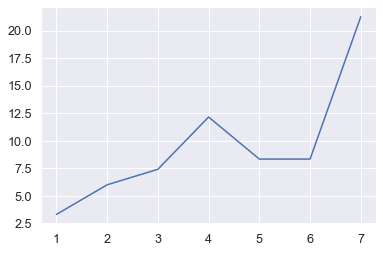

In [115]:
plt.plot(generation_means.index, generation_means['is_legendary']*100)

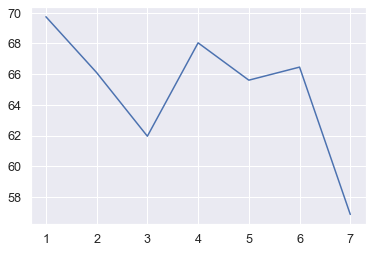

In [116]:
plt.plot(generation_means.index, generation_means['base_happiness'])

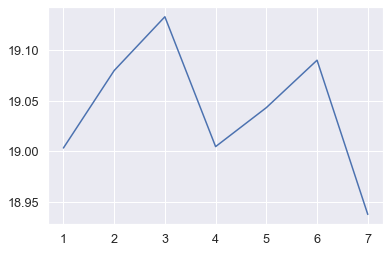

In [117]:
plt.plot(generation_means.index, generation_means['against_sum'])

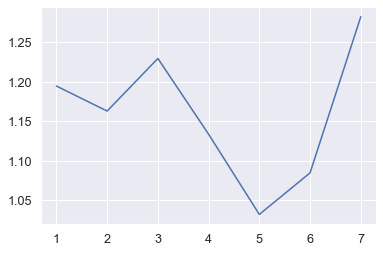

In [118]:
plt.plot(generation_means.index, generation_means['height_m'])

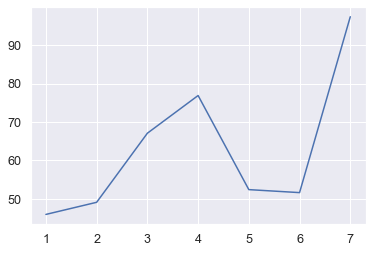

In [119]:
plt.plot(generation_means.index, generation_means['weight_kg'])

In [120]:
df['capture_rate'].dtype

dtype('int64')

<AxesSubplot:xlabel='generation'>

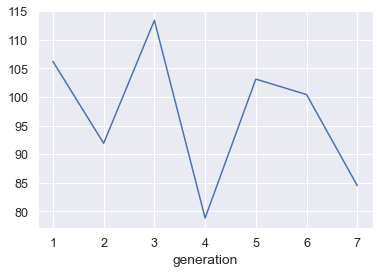

In [121]:
df.groupby('generation').mean()['capture_rate'].plot()

In [122]:
dragon = df[(df['type1'] == 'dragon') | (df['type2'] == 'dragon')]
dark = df[(df['type1'] == 'dark') | (df['type2'] == 'dark')]
bug = df[(df['type1'] == 'bug') | (df['type2'] == 'bug')]
electric = df[(df['type1'] == 'electric') | (df['type2'] == 'electric')]
fairy = df[(df['type1'] == 'fairy') | (df['type2'] == 'fairy')]
fighting = df[(df['type1'] == 'fighting') | (df['type2'] == 'fighting')]
fire = df[(df['type1'] == 'fire') | (df['type2'] == 'fire')]
flying = df[(df['type1'] == 'flying') | (df['type2'] == 'flying')]
ghost = df[(df['type1'] == 'ghost') | (df['type2'] == 'ghost')]
grass = df[(df['type1'] == 'grass') | (df['type2'] == 'grass')]
ground = df[(df['type1'] == 'ground') | (df['type2'] == 'ground')]
ice = df[(df['type1'] == 'ice') | (df['type2'] == 'ice')]
normal = df[(df['type1'] == 'normal') | (df['type2'] == 'normal')]
poison= df[(df['type1'] == 'poison') | (df['type2'] == 'poison')]
psychic = df[(df['type1'] == 'psychic') | (df['type2'] == 'psychic')]
rock = df[(df['type1'] == 'rock') | (df['type2'] == 'rock')]
steel = df[(df['type1'] == 'steel') | (df['type2'] == 'steel')]
water = df[(df['type1'] == 'water') | (df['type2'] == 'water')]

In [123]:
cpt_rt = [dragon['capture_rate'].mean(),
dark['capture_rate'].mean(),
bug['capture_rate'].mean(),
electric['capture_rate'].mean(),
fairy['capture_rate'].mean(),
fighting['capture_rate'].mean(),
fire['capture_rate'].mean(),
flying['capture_rate'].mean(),
ghost['capture_rate'].mean(),
grass['capture_rate'].mean(),
ground['capture_rate'].mean(),
ice['capture_rate'].mean(),
normal['capture_rate'].mean(),
poison['capture_rate'].mean(),
psychic['capture_rate'].mean(),
rock['capture_rate'].mean(),
steel['capture_rate'].mean(),
water['capture_rate'].mean()]

In [124]:
cpt_rt

[43.11363636363637,
 95.74,
 118.67532467532467,
 105.2127659574468,
 101.34042553191489,
 85.32075471698113,
 71.265625,
 91.46938775510205,
 89.78048780487805,
 105.9381443298969,
 103.0625,
 89.3157894736842,
 120.85321100917432,
 124.84375,
 82.73170731707317,
 74.89830508474576,
 70.76086956521739,
 99.6412213740458]

In [125]:
for r in cpt_rt:
    index = cpt_rt.index(r)
    cpt_rt[index] = int(round(r,0))
cpt_rt

[43,
 96,
 119,
 105,
 101,
 85,
 71,
 91,
 90,
 106,
 103,
 89,
 121,
 125,
 83,
 75,
 71,
 100]

In [126]:
types_list

['grass',
 'fire',
 'water',
 'bug',
 'normal',
 'poison',
 'electric',
 'ground',
 'fairy',
 'fighting',
 'psychic',
 'rock',
 'ghost',
 'ice',
 'dragon',
 'dark',
 'steel',
 'flying']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

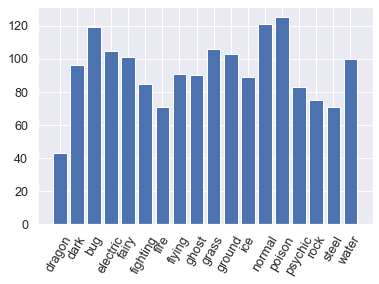

In [127]:
reordered_types = ['dragon','dark','bug','electric','fairy','fighting','fire','flying','ghost','grass','ground', 'ice','normal','poison','psychic','rock','steel','water']
plt.bar(reordered_types, cpt_rt)
plt.xticks(rotation = 60)
# plt.ylim(60,130)

In [128]:
len(reordered_types)

18

In [129]:
base_t = [dragon['base_total'].mean(),
dark['base_total'].mean(),
bug['base_total'].mean(),
electric['base_total'].mean(),
fairy['base_total'].mean(),
fighting['base_total'].mean(),
fire['base_total'].mean(),
flying['base_total'].mean(),
ghost['base_total'].mean(),
grass['base_total'].mean(),
ground['base_total'].mean(),
ice['base_total'].mean(),
normal['base_total'].mean(),
poison['base_total'].mean(),
psychic['base_total'].mean(),
rock['base_total'].mean(),
steel['base_total'].mean(),
water['base_total'].mean()]

In [130]:
for r in base_t:
    index = base_t.index(r)
    base_t[index] = int(round(r,0))
base_t

[513,
 448,
 380,
 439,
 426,
 457,
 452,
 442,
 445,
 411,
 431,
 447,
 402,
 397,
 464,
 447,
 494,
 424]

(350.0, 530.0)

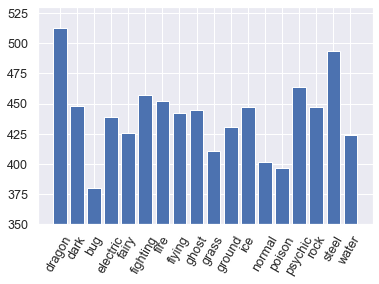

In [131]:
plt.bar(reordered_types,base_t)
plt.xticks(rotation = 60)
plt.ylim(350,530)

In [132]:
df_list = [
    dragon,
    dark,
    bug,
    electric,
    fairy,
    fighting,
    fire,
    flying,
    ghost,
    grass,
    ground,
    ice,
    normal,
    poison,
    psychic,
    rock,
    steel,
    water 
]

len(df_list)

18

Text(0, 0.5, 'Happiness')

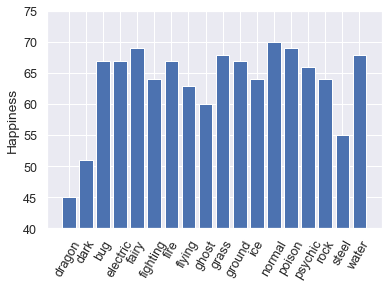

In [133]:
base_h = [dragon['base_happiness'].mean(),
dark['base_happiness'].mean(),
bug['base_happiness'].mean(),
electric['base_happiness'].mean(),
fairy['base_happiness'].mean(),
fighting['base_happiness'].mean(),
fire['base_happiness'].mean(),
flying['base_happiness'].mean(),
ghost['base_happiness'].mean(),
grass['base_happiness'].mean(),
ground['base_happiness'].mean(),
ice['base_happiness'].mean(),
normal['base_happiness'].mean(),
poison['base_happiness'].mean(),
psychic['base_happiness'].mean(),
rock['base_happiness'].mean(),
steel['base_happiness'].mean(),
water['base_happiness'].mean()]


for r in base_h:
    index = base_h.index(r)
    base_h[index] = int(round(r,0))


plt.bar(reordered_types,base_h)
plt.xticks(rotation = 60)
plt.ylim(40,75)
plt.ylabel('Happiness')

In [134]:
reordered_types

['dragon',
 'dark',
 'bug',
 'electric',
 'fairy',
 'fighting',
 'fire',
 'flying',
 'ghost',
 'grass',
 'ground',
 'ice',
 'normal',
 'poison',
 'psychic',
 'rock',
 'steel',
 'water']

Text(0, 0.5, 'Speed')

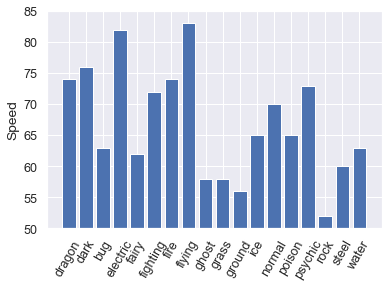

In [135]:
base_s = [dragon['speed'].mean(),
dark['speed'].mean(),
bug['speed'].mean(),
electric['speed'].mean(),
fairy['speed'].mean(),
fighting['speed'].mean(),
fire['speed'].mean(),
flying['speed'].mean(),
ghost['speed'].mean(),
grass['speed'].mean(),
ground['speed'].mean(),
ice['speed'].mean(),
normal['speed'].mean(),
poison['speed'].mean(),
psychic['speed'].mean(),
rock['speed'].mean(),
steel['speed'].mean(),
water['speed'].mean()]


for r in base_s:
    index = base_s.index(r)
    base_s[index] = int(round(r,0))


plt.bar(reordered_types,base_s)
plt.xticks(rotation = 60)
plt.ylim(50,85)
plt.ylabel('Speed')

<AxesSubplot:ylabel='Frequency'>

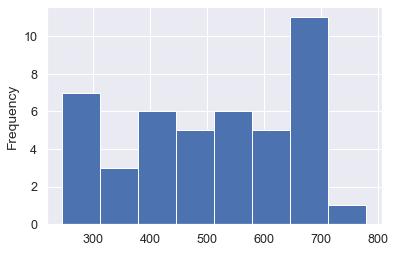

In [136]:
dragon.base_total.plot.hist(bins=8)

<AxesSubplot:ylabel='Frequency'>

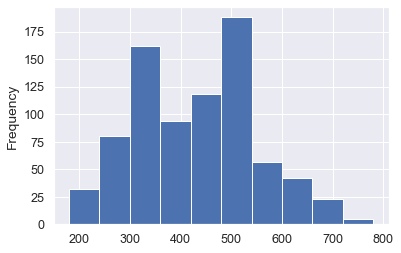

In [137]:
df.base_total.plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

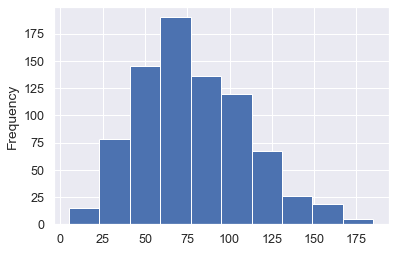

In [138]:
df.attack.plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

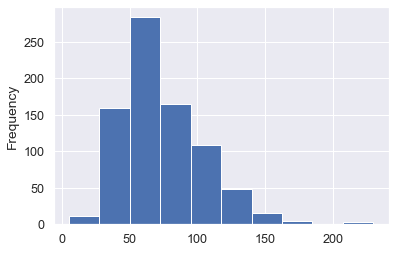

In [139]:
df.defense.plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

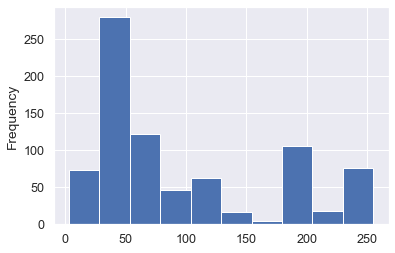

In [140]:
df.capture_rate.plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

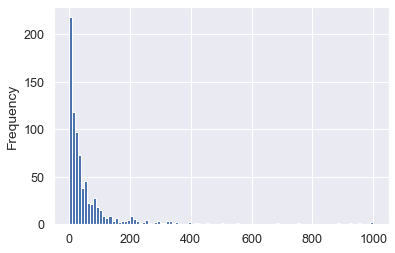

In [141]:
df.weight_kg.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

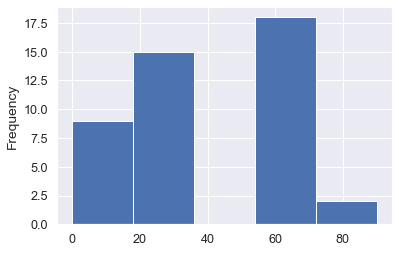

In [142]:
dragon.base_happiness.plot.hist(bins=5)

<AxesSubplot:ylabel='Frequency'>

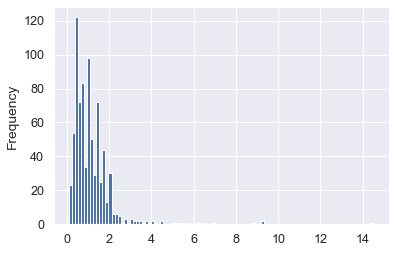

In [143]:
df.height_m.plot.hist(bins=100)

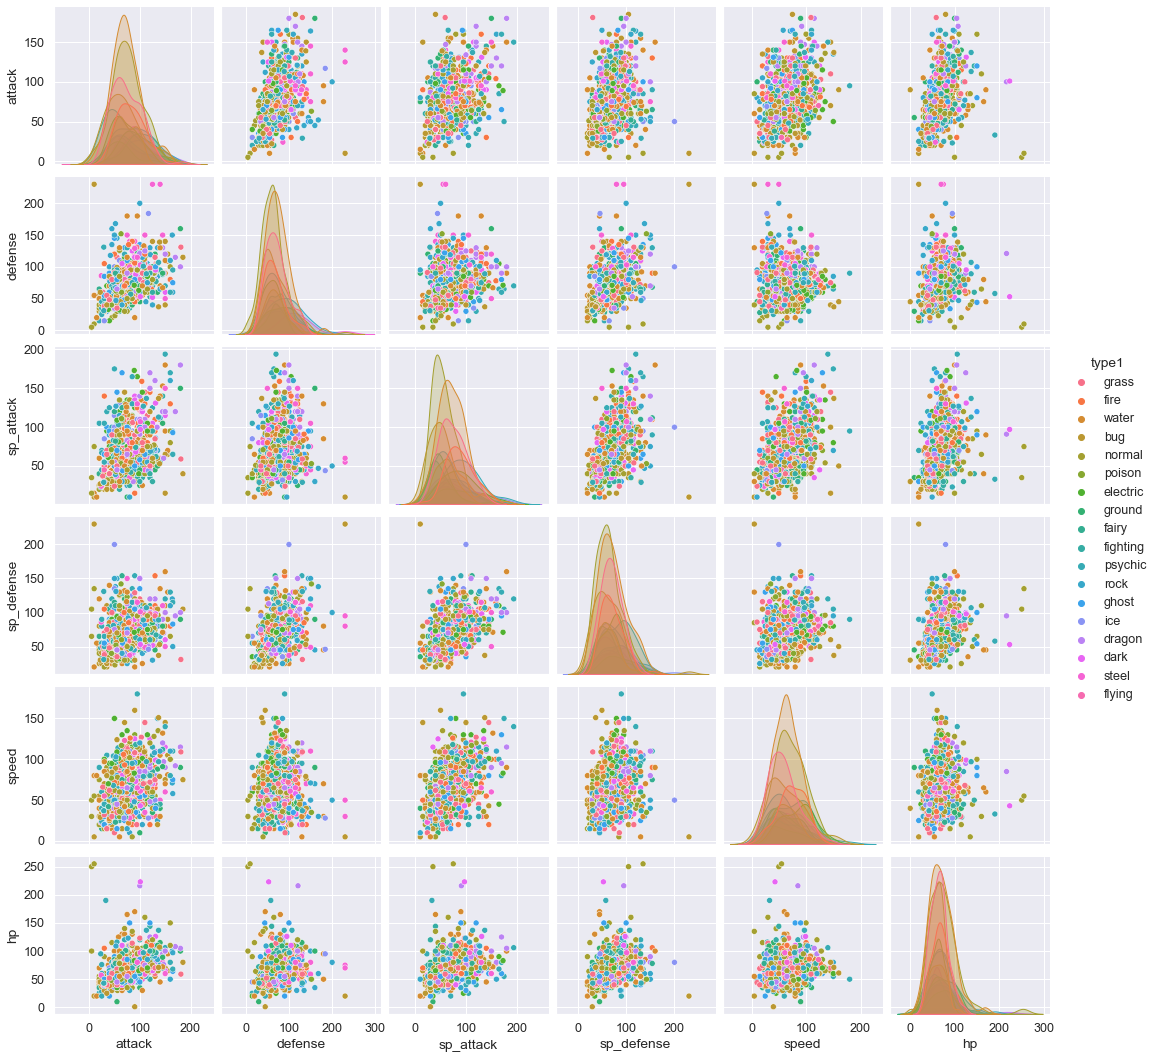

In [144]:
new_stat_df = df[['attack','defense','sp_attack','sp_defense','speed','hp','type1','type2']]
sns.pairplot(new_stat_df, hue='type1')

In [145]:
df['weight_kg'].max()

999.9

In [146]:
df.loc[df['weight_kg'] == 999.9]['name']

789       Cosmoem
796    Celesteela
Name: name, dtype: object

In [147]:
dragon

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,is_legendary,percentage_female,non-binary,ability1,ability2,ability3,ability4,ability5,ability6,against_sum
146,"['Shed Skin', 'Marvel Scale']",1.0,1.0,2.0,0.50,2.0,1.0,0.50,1.0,1.0,...,0,50.0,0,ShedSkin,MarvelScale,None,None,None,None,19.00
147,"['Shed Skin', 'Marvel Scale']",1.0,1.0,2.0,0.50,2.0,1.0,0.50,1.0,1.0,...,0,50.0,0,ShedSkin,MarvelScale,None,None,None,None,19.00
148,"['Inner Focus', 'Multiscale']",0.5,1.0,2.0,1.00,2.0,0.5,0.50,1.0,1.0,...,0,50.0,0,InnerFocus,Multiscale,None,None,None,None,20.25
229,"['Swift Swim', 'Sniper', 'Damp']",1.0,1.0,2.0,1.00,2.0,1.0,0.25,1.0,1.0,...,0,50.0,0,SwiftSwim,Sniper,Damp,None,None,None,18.00
328,['Levitate'],1.0,1.0,2.0,0.00,2.0,1.0,0.50,1.0,1.0,...,0,50.0,0,Levitate,None,None,None,None,None,20.50
329,['Levitate'],1.0,1.0,2.0,0.00,2.0,1.0,0.50,1.0,1.0,...,0,50.0,0,Levitate,None,None,None,None,None,20.50
333,"['Natural Cure', 'Cloud Nine']",0.5,1.0,2.0,1.00,2.0,0.5,0.50,1.0,1.0,...,0,50.0,0,NaturalCure,CloudNine,None,None,None,None,20.25
370,"['Rock Head', 'Sheer Force']",1.0,1.0,2.0,0.50,2.0,1.0,0.50,1.0,1.0,...,0,50.0,0,RockHead,SheerForce,None,None,None,None,19.00
371,"['Rock Head', 'Overcoat']",1.0,1.0,2.0,0.50,2.0,1.0,0.50,1.0,1.0,...,0,50.0,0,RockHead,Overcoat,None,None,None,None,19.00
372,"['Intimidate', 'Moxie']",0.5,1.0,2.0,1.00,2.0,0.5,0.50,1.0,1.0,...,0,50.0,0,Intimidate,Moxie,None,None,None,None,20.25


In [148]:
dragon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary', 'percentage_female', 'non-binary',
       'ability1', 'ability2', 'ability3', 'ability4', 'ability5', 'ability6',
       'against_sum'],
      dtype='object')

In [149]:
dragon.describe().iloc[:, 20:]

,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,percentage_female,non-binary,against_sum
count,44.000000,44.000000,44.000000,44.000000,4.400000e+01,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,44.659091,513.000000,43.113636,85.409091,1.175448e+06,2.111364,82.000000,41.504545,546.659091,90.340909,82.136364,73.636364,156.670455,4.590909,0.250000,38.040909,20.454545,19.676136
std,28.537974,149.524673,32.616315,27.025671,1.374820e+05,1.525781,38.006731,25.163474,190.919798,40.601262,29.806813,25.050731,197.901100,1.702504,0.438019,23.679226,40.803246,1.396195
min,0.000000,245.000000,3.000000,35.000000,6.000000e+05,0.300000,40.000000,0.000000,147.000000,30.000000,30.000000,36.000000,2.800000,1.000000,0.000000,0.000000,0.000000,14.250000
25%,35.000000,410.000000,45.000000,65.000000,1.059860e+06,1.100000,59.500000,50.000000,380.750000,53.750000,52.250000,50.000000,28.775000,3.000000,0.000000,11.900000,0.000000,19.000000
50%,35.000000,520.500000,45.000000,90.000000,1.250000e+06,1.800000,75.500000,50.000000,616.500000,91.000000,87.500000,75.500000,83.500000,5.000000,0.000000,50.000000,0.000000,20.250000
75%,70.000000,680.000000,45.000000,100.000000,1.250000e+06,2.600000,91.250000,50.000000,704.250000,120.000000,100.000000,90.500000,207.375000,6.000000,0.250000,50.000000,0.000000,20.625000
max,90.000000,780.000000,190.000000,135.000000,1.250000e+06,7.000000,223.000000,100.000000,799.000000,180.000000,150.000000,123.000000,888.000000,7.000000,1.000000,100.000000,100.000000,21.500000


<AxesSubplot:xlabel='generation'>

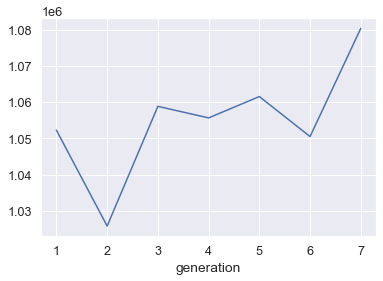

In [150]:
df.groupby('generation').mean()['experience_growth'].plot()

<AxesSubplot:xlabel='generation'>

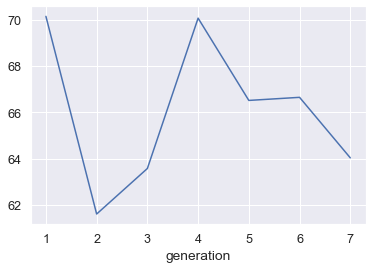

In [151]:
df.groupby('generation').mean()['speed'].plot()

<AxesSubplot:xlabel='generation'>

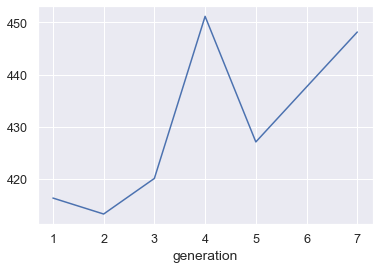

In [152]:
df.groupby('generation').mean()['base_total'].plot()